# Importing Libraries and Reading Dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset into dataframe
df = pd.read_csv("C:\\Users\\GAMEPLAY\\OneDrive\\Desktop\\car data.csv")  
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Exploration

In [111]:
print("\n Dataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe().T)

print("\nMissing Values:\n")
print(df.isnull().sum())

print("Columns")
print(df.columns)


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 106 entries, Year to Transmission_Manual
dtypes: bool(101), float64(2), int64(3)
memory usage: 41.6 KB

Summary Statistics:
               count          mean           std      min      25%      50%  \
Year           301.0   2013.627907      2.891554  2003.00   2012.0   2014.0   
Selling_Price  301.0      4.661296      5.082812     0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.642584     0.32      1.2      6.4   
Driven_kms     301.0  36947.205980  38886.883882   500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915     0.00      0.0      0.0   

                   75%       max  
Year            2016.0    2018.0  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Driven_kms     48767.0  500000.0  
Owner              0.0       3.0  

Missing Values:

Year                       0
Selling_Price              0
Present_Price     

# Correlation Heatmap/

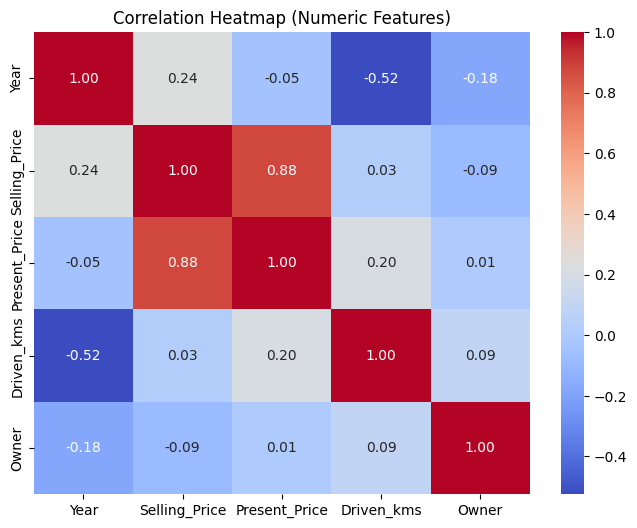

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Preprocessing

In [95]:
df = df.dropna()  # simple cleaning

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Definitions and Model Training

In [149]:
target_col = "Selling_Price" 

X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_df, X_test_df = X_train.copy(), X_test.copy()

# Scale for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

# Train models
models = {
    "Linear Regression": LinearRegression().fit(X_train_scaled, y_train),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_df, y_train)
}

results = {}
for name, model in models.items():
    if name == "Linear Regression":
        y_pred = model.predict(X_test_scaled)
    else:  # Random Forest
        y_pred = model.predict(X_test_df)

    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print(results_df)


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

                        MAE      RMSE        R²
Linear Regression  2.036517  3.036625  0.599702
Random Forest      0.590795  0.867411  0.967337


# Display Results


Model Performance:
                        MAE      RMSE        R²
Linear Regression  2.036517  3.036625  0.599702
Random Forest      0.590795  0.867411  0.967337


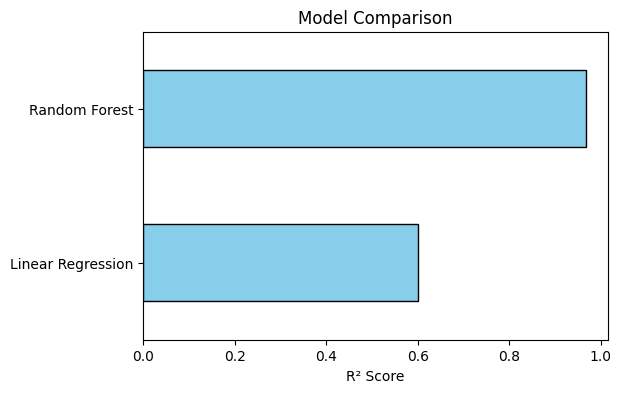

In [157]:
results_df = pd.DataFrame(results).T

print("\nModel Performance:")
print(results_df)

results_df["R²"].plot(kind="barh", figsize=(6,4), color="skyblue", edgecolor="k")
plt.xlabel("R² Score")
plt.title("Model Comparison")
plt.show()

# Visualization


Best Model: Random Forest


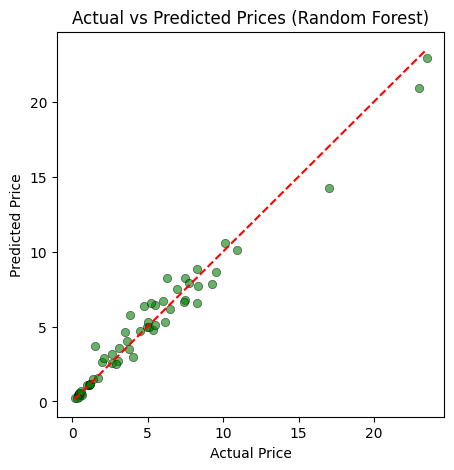

In [161]:
best_model_name = results_df["R²"].idxmax()
print(f"\nBest Model: {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred_best, color="green", alpha=0.6, edgecolor="black")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],"r--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.show()